In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [79]:
df=pd.read_csv(r"C:\Users\abhisv.CORP\3D Objects\Loan\Mobility analytics.csv")

In [80]:
df.shape

(131662, 14)

In [81]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [82]:
df.Surge_Pricing_Type.value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

In [83]:
df2=df[df['Surge_Pricing_Type']==2]

In [84]:
df1=df[df['Surge_Pricing_Type']==1].sample(df2.shape[0],replace=True)
df3=df[df['Surge_Pricing_Type']==3].sample(df2.shape[0],replace=True)

In [85]:
df1.shape,df2.shape,df3.shape

((56728, 14), (56728, 14), (56728, 14))

In [86]:
df=df1.append(df2)

In [87]:
df=df.append(df3)

In [88]:
df.shape

(170184, 14)

In [89]:
df.drop('Trip_ID',axis=1,inplace=True)

In [90]:
df.isnull().sum()

Trip_Distance                      0
Type_of_Cab                    26320
Customer_Since_Months           7541
Life_Style_Index               26248
Confidence_Life_Style_Index    26248
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           94831
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170184 entries, 102156 to 98770
Data columns (total 13 columns):
Trip_Distance                  170184 non-null float64
Type_of_Cab                    143864 non-null object
Customer_Since_Months          162643 non-null float64
Life_Style_Index               143936 non-null float64
Confidence_Life_Style_Index    143936 non-null object
Destination_Type               170184 non-null object
Customer_Rating                170184 non-null float64
Cancellation_Last_1Month       170184 non-null int64
Var1                           75353 non-null float64
Var2                           170184 non-null int64
Var3                           170184 non-null int64
Gender                         170184 non-null object
Surge_Pricing_Type             170184 non-null int64
dtypes: float64(5), int64(4), object(4)
memory usage: 18.2+ MB


In [92]:
df.shape

(170184, 13)

In [93]:
numerical=df.select_dtypes(exclude='O')

In [94]:
numerical.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type'],
      dtype='object')

In [95]:
cat=df.select_dtypes(include='O')

In [96]:
cat.columns

Index(['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Gender'],
      dtype='object')

In [97]:
cat.head(3)

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
102156,B,NaN,A,Male
102748,B,A,A,Male
127282,A,NaN,B,Male


In [98]:
numerical.head(3)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
102156,46.58,10.0,NaN,2.81750,0,58.0,47,79,1
102748,50.38,7.0,2.88047,3.15625,0,64.0,58,86,1
127282,73.09,10.0,NaN,3.27250,1,NaN,57,97,1


In [99]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [100]:
impute_it=IterativeImputer()
numerical1=impute_it.fit_transform(numerical)

In [101]:
numerical1=pd.DataFrame(numerical1,columns=['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type'])

In [102]:
df.drop(numerical,axis=1,inplace=True)

In [106]:
df.reset_index(drop=True,inplace=True)

In [107]:
df=pd.concat([df,numerical1],axis=1)

In [109]:
cat.isna().sum()

Type_of_Cab                    26320
Confidence_Life_Style_Index    26248
Destination_Type                   0
Gender                             0
dtype: int64

In [116]:
gd_dummy=pd.get_dummies(df[['Gender','Destination_Type']],drop_first=True)

In [117]:
df=pd.concat([df,gd_dummy],axis=1)

In [118]:
df.drop(['Gender','Destination_Type'],axis=1,inplace=True)

In [120]:
df.head(1)

,Type_of_Cab,Confidence_Life_Style_Index,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,...,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N
0,B,B,46.58,10.0,2.871311,2.8175,0.0,58.0,47.0,79.0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
y=df['Type_of_Cab']

In [123]:
df.drop('Type_of_Cab',axis=1,inplace=True)

In [124]:
x=df

In [127]:
y=pd.DataFrame(y)

In [147]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=pd.DataFrame(le.fit_transform(y))

In [148]:
from sklearn.neighbors import KNeighborsClassifier

In [149]:
knc=KNeighborsClassifier(n_neighbors=5)

In [156]:
x['Confidence_Life_Style_Index'].unique()

array(['B', 'A', 'C'], dtype=object)

In [157]:
x['Confidence_Life_Style_Index']=x['Confidence_Life_Style_Index'].map({'B':0,'A':1,'C':2})

In [158]:
knc.fit(x,y)
ytoc=knc.predict(x)

In [160]:
ytoc=pd.DataFrame(ytoc)

In [161]:
df=pd.concat([df,ytoc],axis=1)

In [165]:
df.rename(columns={0:'Type_of_cabs'},inplace=True)

In [171]:
df.isna().sum()

Confidence_Life_Style_Index    0
Trip_Distance                  0
Customer_Since_Months          0
Life_Style_Index               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Surge_Pricing_Type             0
Gender_Male                    0
Destination_Type_B             0
Destination_Type_C             0
Destination_Type_D             0
Destination_Type_E             0
Destination_Type_F             0
Destination_Type_G             0
Destination_Type_H             0
Destination_Type_I             0
Destination_Type_J             0
Destination_Type_K             0
Destination_Type_L             0
Destination_Type_M             0
Destination_Type_N             0
Type_of_cabs                   0
dtype: int64

In [110]:
df['Type_of_Cab'].fillna('B',inplace=True)

In [111]:
df['Confidence_Life_Style_Index'].fillna('B',inplace=True)

In [112]:
cat.isna().sum()

Type_of_Cab                    26320
Confidence_Life_Style_Index    26248
Destination_Type                   0
Gender                             0
dtype: int64

In [482]:
df.head()

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
0,B,A,A,Female,6.77,1.0,2.427690,3.90500,0.0,40.000000,46.0,60.0,2.0
1,B,B,A,Male,29.47,10.0,2.782450,3.45000,0.0,38.000000,56.0,78.0,2.0
2,B,B,E,Male,41.58,10.0,2.898417,3.50125,2.0,64.623535,56.0,77.0,2.0
3,C,B,A,Male,61.56,10.0,2.893587,3.45375,0.0,62.131584,52.0,74.0,3.0
4,C,B,A,Male,54.95,10.0,3.034530,3.40250,4.0,51.000000,49.0,102.0,2.0


In [483]:
df_cab=pd.DataFrame(df.groupby('Type_of_Cab')[['Trip_Distance']].sum().reset_index())

Text(0.5, 1.0, 'Business made by each cab')

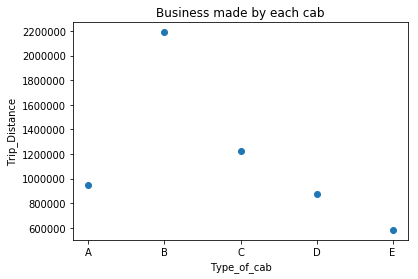

In [484]:
plt.scatter(df_cab['Type_of_Cab'],df_cab['Trip_Distance'])
plt.xlabel('Type_of_cab')
plt.ylabel('Trip_Distance')
plt.title('Business made by each cab')

In [485]:
cat.columns

Index(['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Gender'],
      dtype='object')

In [486]:
cat1=pd.DataFrame(cat['Destination_Type'])

In [487]:
cat.drop('Destination_Type',axis=1,inplace=True)

In [488]:
cat_dummy=pd.get_dummies(cat,drop_first=True)

In [489]:
df=pd.concat([df,cat_dummy],axis=1)

In [490]:
df.drop(cat,axis=1,inplace=True)

In [491]:
def label_encoder(df,cat1):
    le=LabelEncoder()
    for i in cat1: 
        le.fit(df[i])
        x=le.transform(df[i])
        df[i]=x
    return df

In [493]:
df=label_encoder(df,cat1)

In [497]:
df.columns

Index(['Destination_Type', 'Trip_Distance', 'Customer_Since_Months',
       'Life_Style_Index', 'Customer_Rating', 'Cancellation_Last_1Month',
       'Var1', 'Var2', 'Var3', 'Surge_Pricing_Type', 'Type_of_Cab_B',
       'Type_of_Cab_C', 'Type_of_Cab_D', 'Type_of_Cab_E',
       'Confidence_Life_Style_Index_B', 'Confidence_Life_Style_Index_C',
       'Gender_Male'],
      dtype='object')

In [498]:
df.isna().sum()

Destination_Type                 0
Trip_Distance                    0
Customer_Since_Months            0
Life_Style_Index                 0
Customer_Rating                  0
Cancellation_Last_1Month         0
Var1                             0
Var2                             0
Var3                             0
Surge_Pricing_Type               0
Type_of_Cab_B                    0
Type_of_Cab_C                    0
Type_of_Cab_D                    0
Type_of_Cab_E                    0
Confidence_Life_Style_Index_B    0
Confidence_Life_Style_Index_C    0
Gender_Male                      0
dtype: int64

In [499]:
y=pd.DataFrame(df.Surge_Pricing_Type)

In [500]:
df.drop('Surge_Pricing_Type',axis=1,inplace=True)

In [501]:
x=df

In [502]:
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from xgboost import XGBClassifier

In [520]:
rfc=RandomForestClassifier(random_state=1)
rfc.fit(x,y)
y_pred=rfc.predict(x)

In [521]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,r2_score

In [522]:
accuracy_score(y,y_pred)

0.989594567908736

In [523]:
cm=confusion_matrix(y,y_pred)
cm

array([[26932,   207,    75],
       [  184, 56322,   222],
       [   93,   589, 47038]], dtype=int64)

In [525]:
skf=StratifiedKFold(5,shuffle=True,random_state=1)
print(cross_val_score(rfc,x,y,cv=skf,scoring='accuracy'))

[0.73197129 0.73387005 0.73322447 0.73511317 0.73024192]


In [422]:
test_df=pd.read_csv(r"C:\Users\abhisv.CORP\3D Objects\test_VsU9xXK.csv")

In [423]:
test_df.isna().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    13158
Customer_Since_Months           3966
Life_Style_Index               13327
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [424]:
test_df.drop('Trip_ID',axis=1,inplace=True)

In [425]:
test_df.head(3)

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male


In [431]:
cat=test_df.select_dtypes(include='O')

In [432]:
numerical=test_df.select_dtypes(exclude='O')

In [433]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

impute_it=IterativeImputer()
numerical1=impute_it.fit_transform(numerical)

numerical1=pd.DataFrame(numerical1,columns=['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3'])

test_df.drop(numerical,axis=1,inplace=True)

test_df=pd.concat([test_df,numerical1],axis=1)

cat['Type_of_Cab'].mode()
test_df['Type_of_Cab'].fillna('B',inplace=True)
test_df['Confidence_Life_Style_Index'].fillna('B',inplace=True)
cat_dummy=pd.get_dummies(cat,drop_first=True)
test_df.drop(cat,axis=1,inplace=True)
test_df=pd.concat([test_df,cat_dummy],axis=1)

In [434]:
test_df.shape

(87395, 28)

In [436]:
x_test=test_df

In [438]:
x_test_predict=pd.DataFrame(bc.predict(x_test))

In [440]:
x_test_predict.to_csv('sample_submission.csv',index=False)